In [1]:
from nepc import nepc
from nepc.util import config
from nepc.util import parser
from nepc.util import plotter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 120)

In [3]:
cnx, cursor = nepc.connect(local=True)

In [4]:
NEPC_HOME = config.nepc_home()
outdir = NEPC_HOME + "/models/angus/"
mysql_dir = NEPC_HOME + "/mysql/"

In [5]:
species = nepc.table_as_df(cursor, "species")
species

,0,1,2
0,1,N,N
1,2,N-,N$^-$
2,3,N+,N$^+$
3,4,N2,N$_2$
4,5,N2+,N$_2^+$


In [6]:
processes = nepc.table_as_df(cursor, "processes")
processes

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,elastic,Total elastic electron scattering,1,1,1,1,0,0,0,0,0,0
1,2,elastic_partial,Partial elastic electron scattering,1,1,1,1,0,0,0,0,0,0
2,3,excitation,"""Excitation of atoms (electronic), inelastic electron scattering""",1,1,1,1,0,0,0,0,0,0
3,4,excitation_v,"""Excitation of atoms (electronic + vibrational), inelastic electron scattering""",1,1,1,1,0,0,1,1,0,0
4,5,excitation_j,"""Excitation of atoms (electronic + rotational), inelastic electron scattering""",1,1,1,1,0,0,0,0,1,1
5,6,excitation_vj,"""Excitation of atoms (electronic + vibrational + rotational), inelastic electron scattering""",1,1,1,1,0,0,1,1,1,1
6,7,s_deexcitation,Spontaneous de-excitation,1,1,0,0,0,1,0,0,0,0
7,8,s_deexcitation_v,Spontaneous de-excitation (vibrational),1,1,0,0,0,1,1,1,0,0
8,9,s_deexcitation_j,Spontaneous de-excitation (rotational),1,1,0,0,0,1,0,0,1,1
9,10,s_deexcitation_vj,Spontaneous de-excitation (vibrational and rotational),1,1,0,0,0,1,1,1,1,1


In [7]:
states = nepc.table_as_df(cursor, "states")
states

,0,1,2,3,4
0,1,1,N,N,"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": """", ""..."
1,2,1,N_2s22p3_4So,N($2s^22p^3 {}^4S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
2,3,1,N_2s22p3_2Do,N($2s^22p^3 {}^2D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
3,4,1,N_2s22p3_2Po,N($2s^22p^3 {}^2P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""3"", ..."
4,5,1,N_2s22p2_3P_3s_4P,N($2s^22p^2$(${}^3P$)3s ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
5,6,1,N_2s22p2_3P_3s_2P,N($2s^22p^2$(${}^3P$)3s ${}^2P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
6,7,1,N_2s22p4_4P,N($2s^22p^4$ ${}^4P$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""4"", ..."
7,8,1,N_2s22p2_3P_3p_2So,N($2s^22p^2$(${}^3P$)3p ${}^2S^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
8,9,1,N_2s22p2_3P_3p_4Do,N($2s^22p^2$(${}^3P$)3p ${}^4D^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."
9,10,1,N_2s22p2_3P_3p_4Po,N($2s^22p^2$(${}^3P$)3p ${}^4P^o$),"{""{\""order\"": [\""2s\"", \""2p\"", \""CoreTerm\"", \""3s\"", \""3p\"", \""3d\"", \""4s\"", \""4p\""]}"": {""occupations"": {""2p"": ""2"", ..."


In [48]:
state=states[2][1]
state

'N_2s22p3_4So'

In [49]:
cs_subset = nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                           lhsA=state, sigma_cutoff=1E-21, DBUG=True)

Executing the following MySQL string: SELECT cs_id FROM cs LEFT JOIN species s ON (cs.specie_id = s.id) LEFT JOIN processes p ON (cs.process_id = p.id) LEFT JOIN states lhsAs ON (cs.lhsA_id = lhsAs.id) WHERE s.name LIKE 'N' AND p.name LIKE 'excitation' AND lhsAs.name LIKE 'N_2s22p3_4So' AND cs.ref LIKE 'wang2014'
Got the following list of cs_id's: [(46,), (54,), (78,), (108,), (116,), (123,), (137,), (138,), (149,), (172,), (181,), (185,), (192,), (202,), (212,), (213,), (225,), (229,), (234,), (249,), (268,), (300,), (345,), (355,), (374,), (390,)]


In [36]:
cs_df = nepc.model_summary_df(cs_subset)

In [37]:
cs_df

,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135.0,5.295484e-21,None,None
1,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^3 {}^2D^o$) + e$^-$,2.39,135.0,8.848251e-21,None,None
2,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135.0,4.019367e-21,None,None
3,N,excitation,e$^-$ + N($2s^22p^3 {}^4S^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135.0,4.227669e-21,None,None


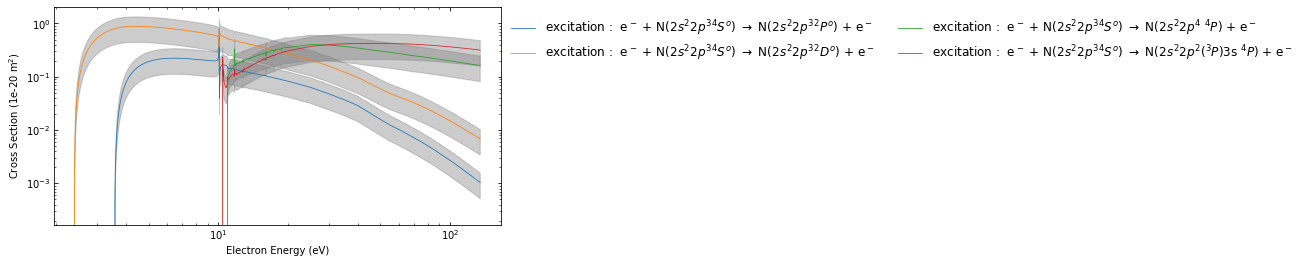

In [38]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset, 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [50]:
state=states[2][2]
state

'N_2s22p3_2Do'

In [51]:
cs_subset = nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                           lhsA=state, sigma_cutoff=1E-21)

In [52]:
cs_df = nepc.model_summary_df(cs_subset)

In [53]:
cs_df

,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135.0,1.255472e-21,None,None
1,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^1D$)3s ${}^2D$) + e$^-$,12.37,135.0,1.054841e-21,None,None
2,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^3 {}^2P^o$) + e$^-$,3.57,135.0,7.947747e-21,None,None
3,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135.0,2.394992e-21,None,None
4,N,excitation,e$^-$ + N($2s^22p^3 {}^2D^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135.0,2.060009e-21,None,None


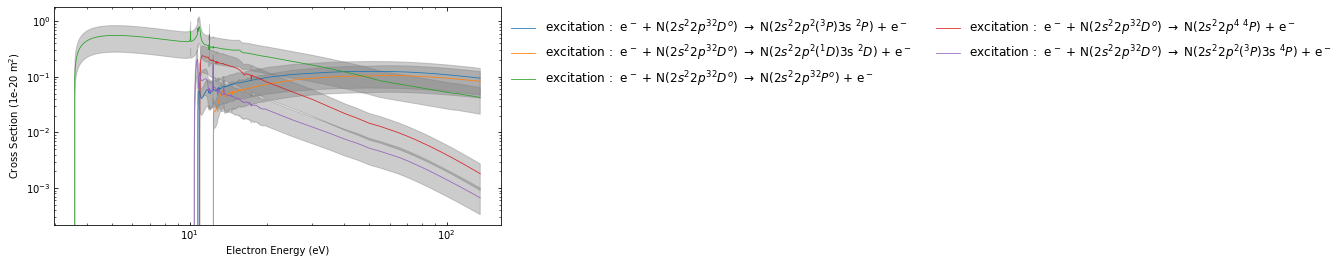

In [54]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset, 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 

In [56]:
state=states[2][3]
state

'N_2s22p3_2Po'

In [64]:
cs_subset = nepc.cs_subset(cursor, specie="N", process="excitation", ref='wang2014', 
                           lhsA=state, sigma_cutoff=1E-21)

In [65]:
cs_df = nepc.model_summary_df(cs_subset)

In [66]:
cs_df

,specie,process,reaction,E_lower,E_upper,sigma_max,lpu,upu
0,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^2P$) + e$^-$,10.77,135.0,1.676042e-21,None,None
1,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^2$(${}^3P$)3s ${}^4P$) + e$^-$,10.42,135.0,2.064054e-21,None,None
2,N,excitation,e$^-$ + N($2s^22p^3 {}^2P^o$) $\rightarrow$ N($2s^22p^4$ ${}^4P$) + e$^-$,10.95,135.0,2.501459e-21,None,None


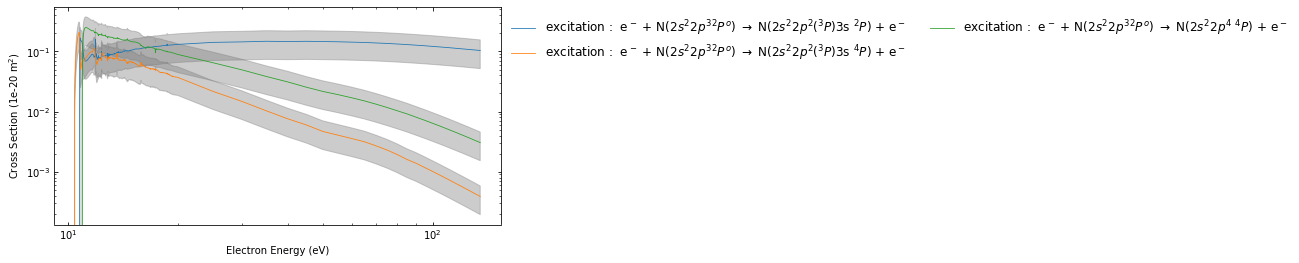

In [67]:
fig, ax = plt.subplots()
plotter.plot_nepc_model(ax, cs_subset, 1E-20,
                        plot_param_dict = {'linewidth':.8}, 
                        #xlim_param_dict = {'left': 10, 'right': 50.0}, 
                        ylog=True, xlog=True, max_plots=8, width=8, height=4) 